In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [6]:
# 1. 데이터 로드
df = pd.read_csv("C:/Users/LIM/OneDrive - gachon.ac.kr/바탕 화면/study/인공지능개론/AAME.csv", parse_dates=['Date'], index_col='Date')

In [8]:
# 2. 사용할 칼럼 선택 (adj close, volume 제외)
df_features = df[['Open', 'High', 'Low', 'Close']]
df_target   = df[['Close']]            # 타깃은 다음날 Close

In [12]:
# 3. 0~1 사이로 정규화
scaler_feat   = MinMaxScaler()
features_scaled = scaler_feat.fit_transform(df_features)

scaler_target = MinMaxScaler()
target_scaled  = scaler_target.fit_transform(df_target)

In [14]:
# 4. 시퀀스 생성 함수 정의
def create_sequences(features, target, window=10):
    X, y = [], []
    for i in range(len(features) - window):
        X.append(features[i : i + window])     # 과거 window일치 입력
        y.append(target[i + window])           # 그 다음날 종가
    return np.array(X), np.array(y)

window = 10
X, y = create_sequences(features_scaled, target_scaled, window)

In [16]:
# 5. 학습/테스트 분리 (시계열이므로 shuffle=False 권장)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [18]:
# 6. RNN 모델 구성
model = Sequential([
    Input(shape=(window, X.shape[2])),    # (10, 4)
    SimpleRNN(50, activation='tanh'),
    Dense(1, activation='linear')         # 실수 예측이므로 linear
])
model.compile(optimizer='adam', loss='mse')

In [20]:
# 7. 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0044 - val_loss: 6.4129e-05
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7380e-04 - val_loss: 7.1109e-05
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5408e-04 - val_loss: 5.8433e-05
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4568e-04 - val_loss: 5.0964e-05
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4957e-04 - val_loss: 1.3605e-04
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3805e-04 - val_loss: 4.8179e-05
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0279e-04 - val_loss: 5.0808e-05
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2883e-04 - val_loss: 4.2336e-05
Epoch 9/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.7567e-05 - val_loss: 4.9348e-05
Epoch 10/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0901e-04 - val_loss: 5.7276e-05
Epoch 11/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.

In [22]:
# 8. 예측 및 스케일 역변환
y_pred      = model.predict(X_test)
y_pred_inv  = scaler_target.inverse_transform(y_pred)
y_test_inv  = scaler_target.inverse_transform(y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


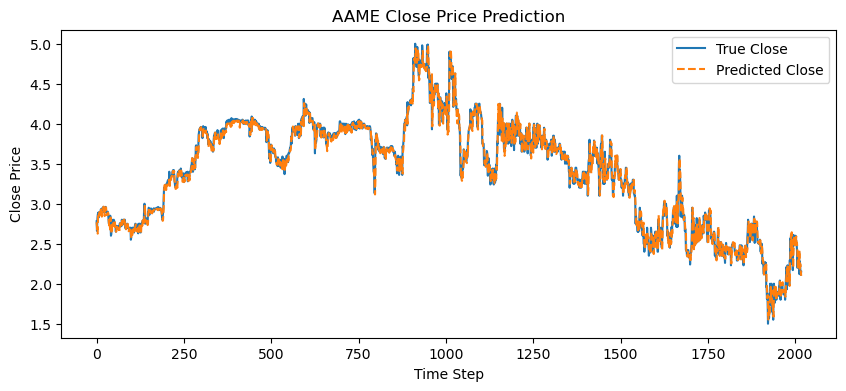

In [24]:
# 9. 예측 결과 시각화
plt.figure(figsize=(10, 4))
plt.plot(y_test_inv,  label='True Close')
plt.plot(y_pred_inv,  label='Predicted Close', linestyle='--')
plt.title('AAME Close Price Prediction')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.show()